                     importing libraries

In [2]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

                       Load the dataset

In [3]:

df = pd.read_csv('vehicles.csv')  # Replace with your file path

/var/folders/rk/mrnzb2hd5gvb5bn9n0c0lcdc0000gn/T/ipykernel_14005/3544402824.py:1: DtypeWarning: Columns (72,74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vehicles.csv')  # Replace with your file path


          Selecting potential features and target variables

In [4]:

selected_columns = ['displ', 'cylinders', 'drive', 'fuelType', 'trany', 'city08', 'highway08', 'comb08']
df_reduced = df[selected_columns]

     Handling Missing Values
    Numeric columns: filling missing values with the median

In [5]:

imputer = SimpleImputer(strategy='median')
df_reduced['displ'] = imputer.fit_transform(df_reduced[['displ']])
df_reduced['cylinders'] = imputer.fit_transform(df_reduced[['cylinders']])

/var/folders/rk/mrnzb2hd5gvb5bn9n0c0lcdc0000gn/T/ipykernel_14005/3369040061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['displ'] = imputer.fit_transform(df_reduced[['displ']])
/var/folders/rk/mrnzb2hd5gvb5bn9n0c0lcdc0000gn/T/ipykernel_14005/3369040061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['cylinders'] = imputer.fit_transform(df_reduced[['cylinders']])


In [6]:
# Categorical columns: filling missing values with the mode (most frequent value)
for column in ['drive', 'trany']:
    mode_value = df_reduced[column].mode()[0]
    df_reduced[column].fillna(mode_value, inplace=True)

/var/folders/rk/mrnzb2hd5gvb5bn9n0c0lcdc0000gn/T/ipykernel_14005/145544693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[column].fillna(mode_value, inplace=True)


In [7]:
# Encoding Categorical Data
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categories = encoder.fit_transform(df_reduced[['drive', 'fuelType', 'trany']])
encoded_categories_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['drive', 'fuelType', 'trany']))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


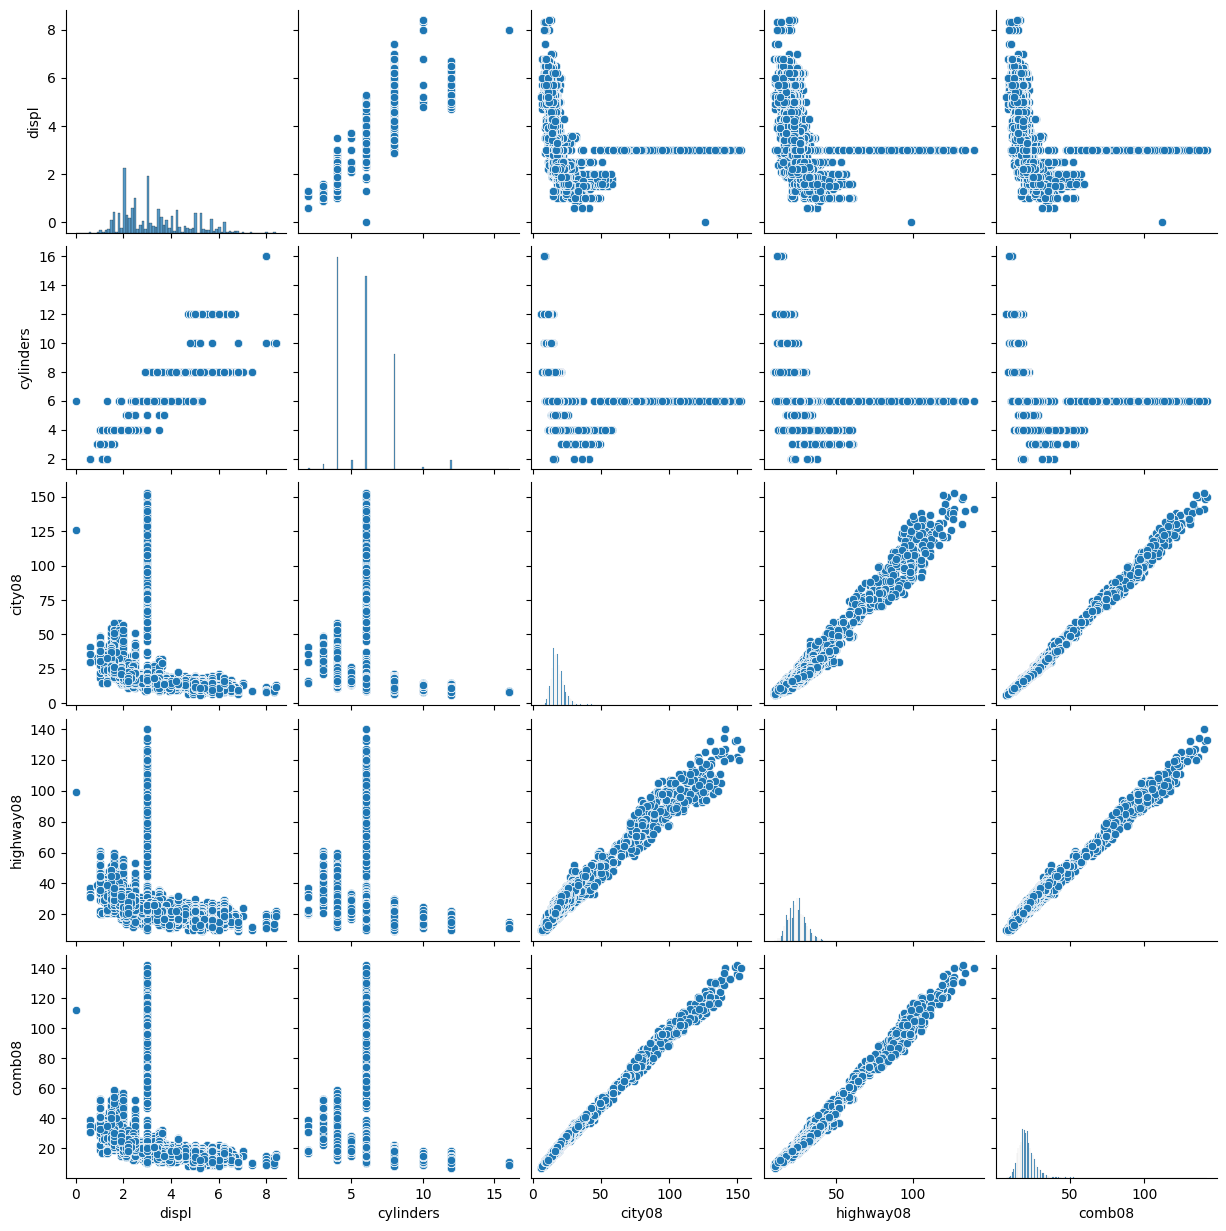

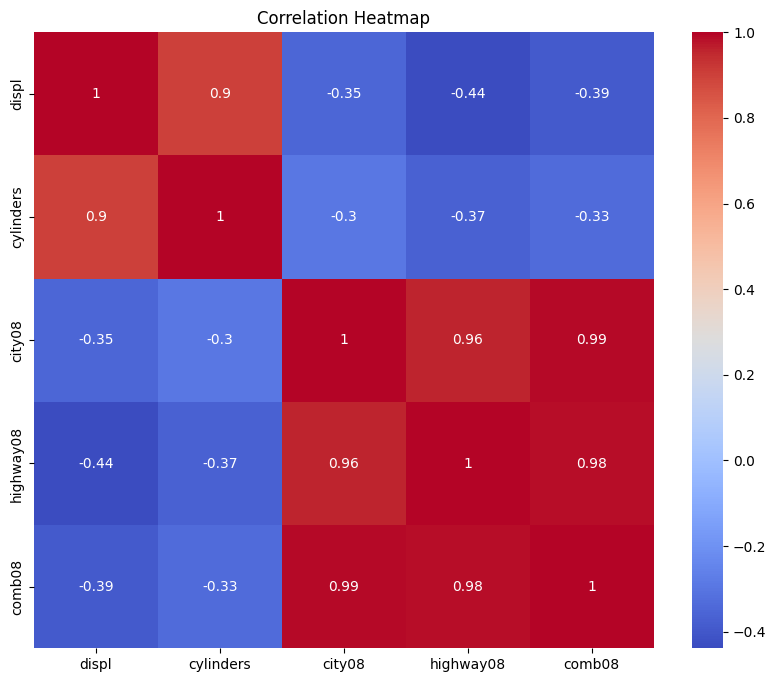

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: Analyzing distributions and relationships

# Selecting a few key features and target for visualization
eda_features = ['displ', 'cylinders', 'city08', 'highway08', 'comb08']

# Pairplot to visualize the relationships between features and target variables
sns.pairplot(df_reduced[eda_features])
plt.show()

# Correlation heatmap for these features
correlation_matrix = df_reduced[eda_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [9]:
# Concatenating encoded features back to the dataframe
df_reduced_encoded = pd.concat([df_reduced.drop(['drive', 'fuelType', 'trany'], axis=1), encoded_categories_df], axis=1)

In [10]:
# Defining input features (X) and target variable (y)
X = df_reduced_encoded.drop(['city08', 'highway08', 'comb08'], axis=1)
y = df_reduced_encoded['comb08']  # Change this to 'city08' or 'highway08' based on your target

In [11]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [12]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Ridge Regression': Ridge()
}

In [13]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R² score:', r2_score(y_test, y_pred))


MSE: 13.537444731430103
R² score: 0.8914340369181017


In [14]:
# Important hyperparameter: alpha (regularization strength)
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R² score:', r2_score(y_test, y_pred))


MSE: 13.52769968159847
R² score: 0.8915121890909261


In [15]:
# Important hyperparameters: n_estimators (number of trees), max_depth
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R² score:', r2_score(y_test, y_pred))


MSE: 9.549128339111151
R² score: 0.9234190546816192


In [16]:
# Important hyperparameters: kernel, C (regularization), gamma (kernel coefficient)
model_svr = SVR(kernel='rbf', C=1.0, gamma='scale')
model_svr.fit(X_train, y_train)
y_pred = model_svr.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R² score:', r2_score(y_test, y_pred))


MSE: 35.38606813301568
R² score: 0.7162150876506901


In [17]:
#Important hyperparameters: n_neighbors, weights
model_knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R² score:', r2_score(y_test, y_pred))


MSE: 8.435670299439211
R² score: 0.9323486308923801


In [18]:
# Important hyperparameters: max_depth, min_samples_split
model_dt = DecisionTreeRegressor(max_depth=10, min_samples_split=2)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R² score:', r2_score(y_test, y_pred))


MSE: 9.887648800613732
R² score: 0.9207042291990355


In [19]:
# Training and evaluating each model
results = {'Model': [], 'RMSE': [], 'R-squared': [], 'Accuracy': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    if model_name in ['K-Nearest Neighbors', 'Decision Tree']:
        # Calculate accuracy for non-regression models
        accuracy = accuracy_score(y_test, y_pred.round())  # Assuming regression outputs are rounded for classification
    else:
        accuracy = np.nan  # Not applicable for regression models
    
    # Store results in dictionary
    results['Model'].append(model_name)
    results['RMSE'].append(rmse)
    results['R-squared'].append(r2)
    results['Accuracy'].append(accuracy)

In [20]:
# Creating a DataFrame for results
results_df = pd.DataFrame(results)


In [21]:
# Display results table
print(results_df)

                    Model      RMSE  R-squared  Accuracy
0       Linear Regression  3.679327   0.891434       NaN
1           Random Forest  2.756083   0.939083       NaN
2  Support Vector Machine  5.948619   0.716215       NaN
3     K-Nearest Neighbors  2.904423   0.932349  0.308010
4           Decision Tree  2.752455   0.939243  0.332452
5        Ridge Regression  3.678002   0.891512       NaN


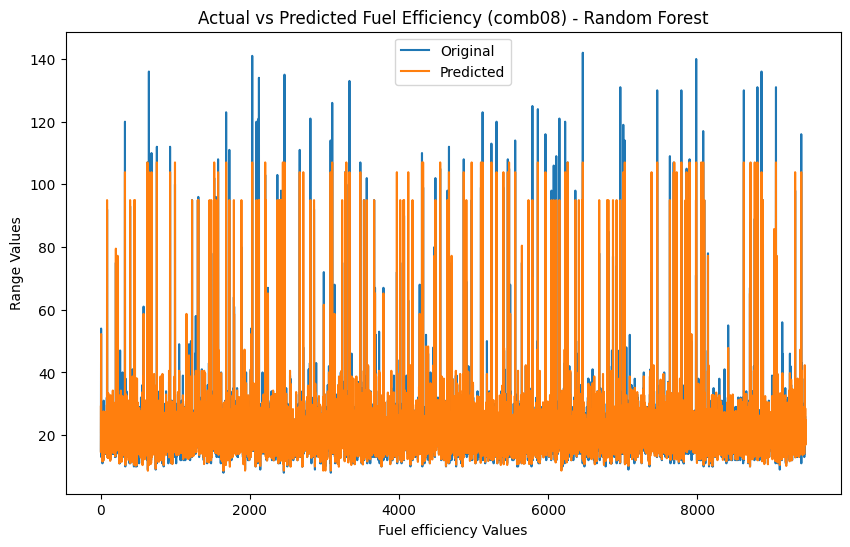

In [22]:
# Plotting Actual vs Predicted values for Random Forest (for example)
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test)), y=y_test, label="Original")
sns.lineplot(x=range(len(y_test)), y=models['Random Forest'].predict(X_test), label="Predicted")
plt.xlabel('Fuel efficiency Values')
plt.ylabel('Range Values')
plt.legend()
plt.title('Actual vs Predicted Fuel Efficiency (comb08) - Random Forest')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.show()


In [23]:
import plotly.graph_objects as go

# Convert range to list for x-axis
x_values = list(range(len(y_test)))

# Create traces
fig = go.Figure()

# Original data trace
fig.add_trace(go.Scatter(x=x_values, y=y_test,
                    mode='lines',
                    name='Original'))

# Predicted data trace
fig.add_trace(go.Scatter(x=x_values, y=models['Random Forest'].predict(X_test),
                    mode='lines',
                    name='Predicted'))

# Add layout
fig.update_layout(title='Actual vs Predicted Fuel Efficiency (comb08) - Random Forest',
                   xaxis_title='Fuel efficiency Values',
                   yaxis_title='Range Values',
                   legend=dict(x=0, y=1, traceorder="normal", font=dict(family="sans-serif", size=12, color="black")))

fig.show()
